In [1]:
import pandas as pd

langdf = pd.read_csv("languages.csv")

print(langdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB
None


In [3]:
print(pd.value_counts(langdf["language"]))

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64


In [4]:
print(langdf.isnull().sum())

Text        0
language    0
dtype: int64


In [11]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(langdf["Text"],langdf["language"],test_size=0.2,random_state=4,stratify=langdf["language"])
print(len(pd.value_counts(ytrain)))
print(len(pd.value_counts(ytest)))

22
22


In [12]:
import re
def transform(data):
    list = []
    for i in data:
        newi = re.sub(r"[!£$%^&*(),:;'?.0-9+=]"," ",i)
        newi = newi.lower()
        list.append(newi)
    return list 

newXtrain = transform(Xtrain)

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
newXtrain = cv.fit_transform(newXtrain)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc = RandomForestClassifier()
rfc.fit(newXtrain,ytrain)

newXtest = transform(Xtest)
newXtest = cv.transform(newXtest)
testpred = rfc.predict(newXtest)
trainpred = rfc.predict(newXtrain)

print(classification_report(ytrain,trainpred))

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       800
     Chinese       1.00      1.00      1.00       800
       Dutch       1.00      1.00      1.00       800
     English       1.00      1.00      1.00       800
    Estonian       1.00      1.00      1.00       800
      French       1.00      1.00      1.00       800
       Hindi       1.00      1.00      1.00       800
  Indonesian       1.00      1.00      1.00       800
    Japanese       1.00      1.00      1.00       800
      Korean       1.00      1.00      1.00       800
       Latin       1.00      1.00      1.00       800
     Persian       1.00      1.00      1.00       800
   Portugese       1.00      1.00      1.00       800
      Pushto       1.00      1.00      1.00       800
    Romanian       1.00      1.00      1.00       800
     Russian       1.00      1.00      1.00       800
     Spanish       1.00      1.00      1.00       800
     Swedish       1.00    

In [14]:
print(classification_report(ytest,testpred))

              precision    recall  f1-score   support

      Arabic       0.99      0.99      0.99       200
     Chinese       0.63      0.94      0.76       200
       Dutch       1.00      0.97      0.99       200
     English       0.84      0.99      0.91       200
    Estonian       0.98      0.94      0.96       200
      French       0.96      1.00      0.98       200
       Hindi       1.00      0.97      0.98       200
  Indonesian       0.99      0.98      0.99       200
    Japanese       0.92      0.55      0.69       200
      Korean       1.00      0.95      0.98       200
       Latin       0.97      0.95      0.96       200
     Persian       1.00      0.99      0.99       200
   Portugese       0.99      0.99      0.99       200
      Pushto       1.00      0.95      0.97       200
    Romanian       0.99      0.99      0.99       200
     Russian       0.99      0.96      0.97       200
     Spanish       0.99      0.99      0.99       200
     Swedish       1.00    

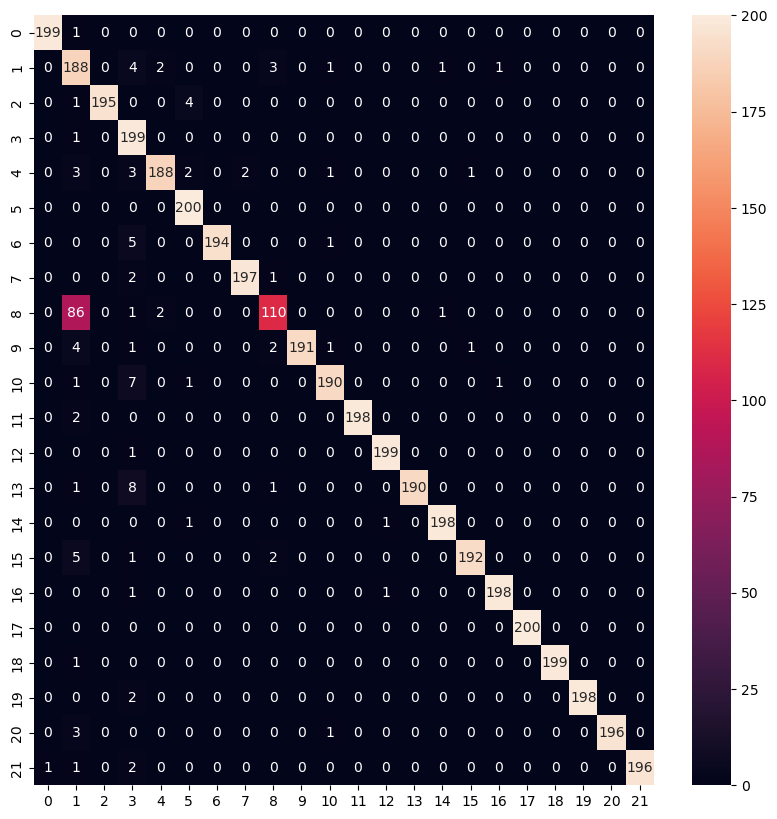

In [16]:
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt 

testcm = metrics.confusion_matrix(ytest,testpred)

plt.figure(figsize=(10,10))
sns.heatmap(testcm,annot=True,fmt="d")
plt.show()

In [22]:
def checklang(text,lang):
    newtext = transform(text)
    newtext = cv.transform(newtext)
    pred = rfc.predict(newtext)
    if pred[0] == lang:
        return "correct predicted= "+pred[0]
    else:
        return "incorrect predicted= "+pred[0]
    
print(checklang("Analytics Vidhya provides a community based knowledge portal for Analytics and Data Science professionals","English"))
print(checklang("Analytics Vidhya fournit un portail de connaissances basé sur la communauté pour les professionnels de l'analyse et de la science des données","French"))
print(checklang("توفر Analytics Vidhya بوابة معرفية قائمة على المجتمع لمحترفي التحليلات ","Arabic"))
print(checklang("Analytics Vidhya proporciona un portal de conocimiento basado en la comunidad para profesionales de Analytics y Data Science.","Spanish"))
print(checklang("Analytics Vidhya - это портал знаний на базе сообщества для профессионалов в области аналитики и данных.","Russian"))
print(checklang("московская патриархия — учреждение русской православной церкви объединяющее структуры непосредственно руководимые патриархом патриарх — священноархимандрит настоятель троице-сергиевой лавры а также ряда других монастырей имеющих статус патриарших ставропигий","Russian"))

incorrect predicted= Chinese
incorrect predicted= Chinese
incorrect predicted= Chinese
incorrect predicted= Chinese
incorrect predicted= Chinese
incorrect predicted= Chinese
